##1. Basics##

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms, datasets

from torch import nn
import torch.nn.functional as F

from torch import optim

print ("Version of imported torch is", torch.__version__)

Version of imported torch is 1.10.0+cu111


In [ ]:
# Multiplying two tensors
x = torch.Tensor([2,3])
y = torch.Tensor([1,5])
x*y

tensor([ 2., 15.])

In [ ]:
# Creating a tensor contains all 0
z = torch.zeros([3,6])
z

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [ ]:
# Size of the tensor
z.shape

torch.Size([3, 6])

In [ ]:
# Reshaping the tensor
z.view(2,9)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# Random tensor
a = torch.rand([2,5])
a

tensor([[0.7928, 0.2797, 0.3687, 0.5113, 0.9407],
        [0.8065, 0.3083, 0.8107, 0.2050, 0.0059]])

##2. Data preparation##

In [ ]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
test

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
trainset

In [ ]:
testset

In [2]:
#for data in trainset:
  #print (data)

In [ ]:
x, y = data[0][8], data[1][8]

In [ ]:
(x.shape, y, )

(torch.Size([1, 28, 28]), tensor(4))

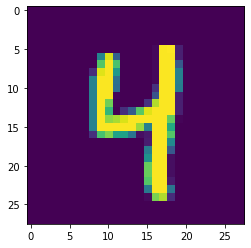

In [ ]:
plt.imshow(x.view(28,28))
plt.show()

##3. Building basic Artificial Neural Network [ANN]##

In [ ]:
# ANN model class >---> 4 layers of 28*28 -> 64 - 64 - 64 -> 10 output neurons

class Net(nn.Module):
  def __init__ (self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return (F.log_softmax(x, dim=1))

net = Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# Just check the ANN class

xin = torch.rand(28,28)
xin = xin.view(-1, 28*28)

net.forward(xin)

tensor([[-2.3133, -2.2208, -2.1767, -2.4207, -2.2777, -2.3838, -2.1752, -2.3468,
         -2.3642, -2.3831]], grad_fn=<LogSoftmaxBackward0>)

Training...

In [ ]:
optimizer = optim.Adam(net.parameters() ,lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print (loss)

tensor(0.2719, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)


In [ ]:
# Evaluation in training dataset

correct, total = 0, 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1,28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print ("Accuracy is ", correct/total)

Accuracy is  0.9690833333333333


In [ ]:
# Evaluation in testing dataset

correct, total = 0, 0

with torch.no_grad():
  for data in testset:
    X, y = data
    output = net(X.view(-1,28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print ("Accuracy is ", correct/total)

Accuracy is  0.957


Just check one sample

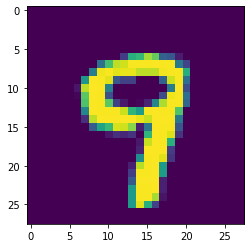

In [ ]:
plt.imshow(X[7].view(28,28))
plt.show()

In [ ]:
print (torch.argmax(net(X[7].view(-1,28*28))))

tensor(9)


##4. Convolutional Neural Network [CNN]##

In [ ]:
#Import libraries

import os, cv2
from tqdm import tqdm
import numpy as np

In [ ]:
REBUILD_DATA = True

class DogVScat():
  IMG_SIZE = 50
  